# Análisis Exploratorio de Datos - Severidad de Siniestros Actuariales

**Objetivo**: Analizar y comprender el comportamiento de los datos de siniestros de seguros.

**Variables**:
- `edad`: Edad del asegurado (18-70 años)
- `tipo_vehiculo`: Tipo de vehículo asegurado
- `antiguedad_vehiculo`: Años de antigüedad del vehículo
- `region`: Región geográfica
- `historial_siniestros`: Número de siniestros previos
- `costo_siniestro`: Variable objetivo (costo del siniestro)

In [ ]:
pip install matplotlib seaborn pandas numpy scipy statsmodels jupyterlab scikit-learn jupyter fastapi uvicorn python-multipart pydantic

In [4]:
#Importar librerías

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# CORRECCIÓN: Añadir la ruta correcta al path
project_root = os.path.abspath('..')  # Subir un nivel desde notebooks/
sys.path.append(project_root)

# Ahora importamos directamente desde nuestros módulos
from src.data.make_dataset import generate_sample_data

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("✅ Librerías importadas correctamente")
print(f"📁 Directorio actual: {os.getcwd()}")
print(f"📁 Ruta del proyecto: {project_root}")

✅ Librerías importadas correctamente
📁 Directorio actual: /home/mz8k/mlops-severidad-siniestros-actuariales/notebooks
📁 Ruta del proyecto: /home/mz8k/mlops-severidad-siniestros-actuariales


In [5]:
# Generar datos sintéticos
print("📊 Generando dataset sintético de siniestros...")
df = generate_sample_data()

print(f"📐 Dimensiones del dataset: {df.shape}")
print(f"🎯 Variable objetivo: 'costo_siniestro'")
print("\n🔍 Primeras 5 filas:")
df.head()


📊 Generando dataset sintético de siniestros...
📐 Dimensiones del dataset: (1000, 6)
🎯 Variable objetivo: 'costo_siniestro'

🔍 Primeras 5 filas:


,edad,tipo_vehiculo,antiguedad_vehiculo,region,historial_siniestros,costo_siniestro
0,56,Pickup,16,Oeste,3,2266.121903
1,69,Pickup,17,Sur,1,3016.702311
2,46,Pickup,7,Este,3,1212.801990
3,32,Motocicleta,12,Oeste,0,4679.692173
4,60,Sedan,18,Oeste,0,689.014119


In [6]:
# Información general del dataset
print("📋 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 50)
print(df.info())
print("\n" + "=" * 50)
print("📊 ESTADÍSTICAS DESCRIPTIVAS")
print(df.describe())


📋 INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edad                  1000 non-null   int64  
 1   tipo_vehiculo         1000 non-null   object 
 2   antiguedad_vehiculo   1000 non-null   int64  
 3   region                1000 non-null   object 
 4   historial_siniestros  1000 non-null   int64  
 5   costo_siniestro       1000 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB
None

📊 ESTADÍSTICAS DESCRIPTIVAS
             edad  antiguedad_vehiculo  historial_siniestros  costo_siniestro
count  1000.00000          1000.000000            1000.00000      1000.000000
mean     43.81900             9.396000               1.98100      1993.015481
std      14.99103             5.744404               1.42642      1408.417151
min      18.00000             0.000000      

In [7]:
# Análisis de valores nulos
print("🔍 ANÁLISIS DE VALORES NULOS")
print("=" * 30)
print(df.isnull().sum())
print(f"\n✅ No hay valores nulos en el dataset")


🔍 ANÁLISIS DE VALORES NULOS
edad                    0
tipo_vehiculo           0
antiguedad_vehiculo     0
region                  0
historial_siniestros    0
costo_siniestro         0
dtype: int64

✅ No hay valores nulos en el dataset


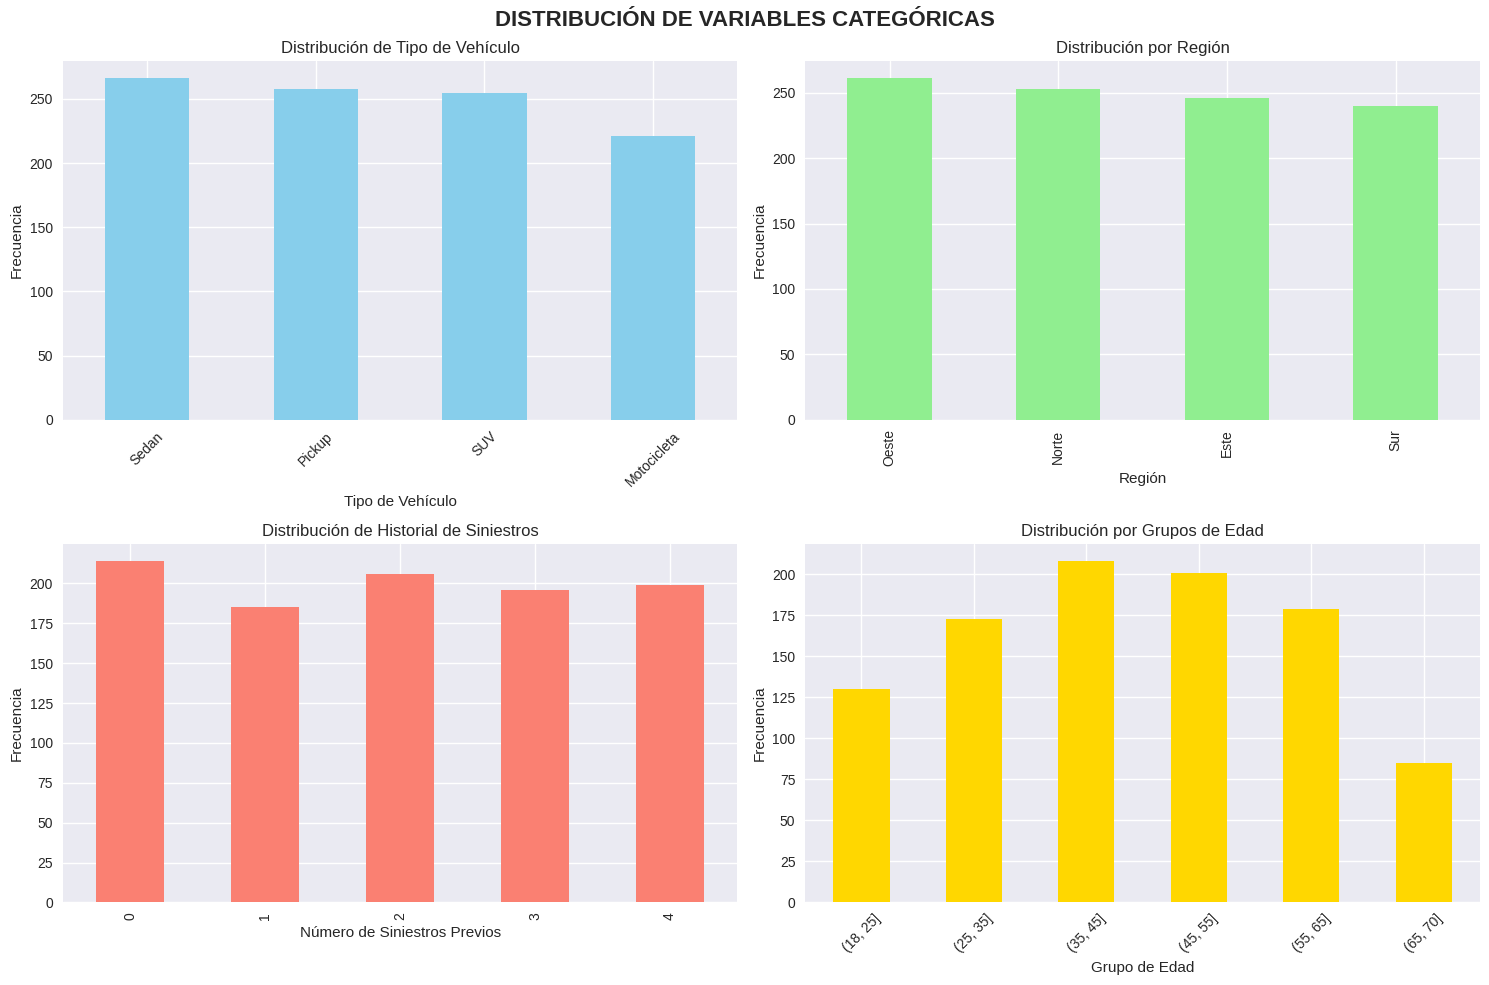

In [8]:
# Distribución de variables categóricas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS', fontsize=16, fontweight='bold')

# Tipo de vehículo
df['tipo_vehiculo'].value_counts().plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Distribución de Tipo de Vehículo')
axes[0,0].set_xlabel('Tipo de Vehículo')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].tick_params(axis='x', rotation=45)

# Región
df['region'].value_counts().plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Distribución por Región')
axes[0,1].set_xlabel('Región')
axes[0,1].set_ylabel('Frecuencia')

# Historial de siniestros
df['historial_siniestros'].value_counts().sort_index().plot(kind='bar', ax=axes[1,0], color='salmon')
axes[1,0].set_title('Distribución de Historial de Siniestros')
axes[1,0].set_xlabel('Número de Siniestros Previos')
axes[1,0].set_ylabel('Frecuencia')

# Edad (agrupada)
df['edad_grupo'] = pd.cut(df['edad'], bins=[18, 25, 35, 45, 55, 65, 70])
df['edad_grupo'].value_counts().sort_index().plot(kind='bar', ax=axes[1,1], color='gold')
axes[1,1].set_title('Distribución por Grupos de Edad')
axes[1,1].set_xlabel('Grupo de Edad')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Interpretación de las Gráficas 

### 1. **Distribución de Tipo de Vehículo:** Vehículos más pesados (SUV, Pickup) suelen tener costos de siniestro más altos

### 2. **Distribución por Región:** Regiones con mayor densidad poblacional suelen tener más siniestros

### 3. **Historial de Siniestros:** Los asegurados con mayor historial representan mayor riesgo

### 4. **Grupos de Edad:** Conductores jóvenes (18-25) y mayores (65+) suelen tener mayor siniestralidad

In [9]:
# Análisis descriptivo de la variable objetivo
print("🎯 ANÁLISIS DE LA VARIABLE OBJETIVO: COSTO_SINIESTRO")
print("=" * 60)

# Estadísticas descriptivas detalladas
costo_stats = df['costo_siniestro'].describe()
print("📊 Estadísticas descriptivas básicas:")
print(costo_stats)

# Estadísticas adicionales relevantes para seguros
print(f"\n📈 Estadísticas actuariales importantes:")
print(f"• Media: ${costo_stats['mean']:,.2f}")
print(f"• Mediana: ${costo_stats['50%']:,.2f}")
print(f"• Desviación estándar: ${costo_stats['std']:,.2f}")
print(f"• Coeficiente de variación: {(costo_stats['std']/costo_stats['mean'])*100:.2f}%")
print(f"• Mínimo: ${costo_stats['min']:,.2f}")
print(f"• Máximo: ${costo_stats['max']:,.2f}")
print(f"• Percentil 95: ${df['costo_siniestro'].quantile(0.95):,.2f}")
print(f"• Percentil 99: ${df['costo_siniestro'].quantile(0.99):,.2f}")

# Asimetría y curtosis (importante en distribuciones de seguros)
from scipy.stats import skew, kurtosis
print(f"\n📐 Medidas de forma:")
print(f"• Asimetría (skewness): {skew(df['costo_siniestro']):.4f}")
print(f"• Curtosis (kurtosis): {kurtosis(df['costo_siniestro']):.4f}")

🎯 ANÁLISIS DE LA VARIABLE OBJETIVO: COSTO_SINIESTRO
📊 Estadísticas descriptivas básicas:
count    1000.000000
mean     1993.015481
std      1408.417151
min        48.125511
25%       965.030925
50%      1629.676942
75%      2659.428230
max      9568.374496
Name: costo_siniestro, dtype: float64

📈 Estadísticas actuariales importantes:
• Media: $1,993.02
• Mediana: $1,629.68
• Desviación estándar: $1,408.42
• Coeficiente de variación: 70.67%
• Mínimo: $48.13
• Máximo: $9,568.37
• Percentil 95: $4,754.70
• Percentil 99: $6,677.83

📐 Medidas de forma:
• Asimetría (skewness): 1.3629
• Curtosis (kurtosis): 2.3439


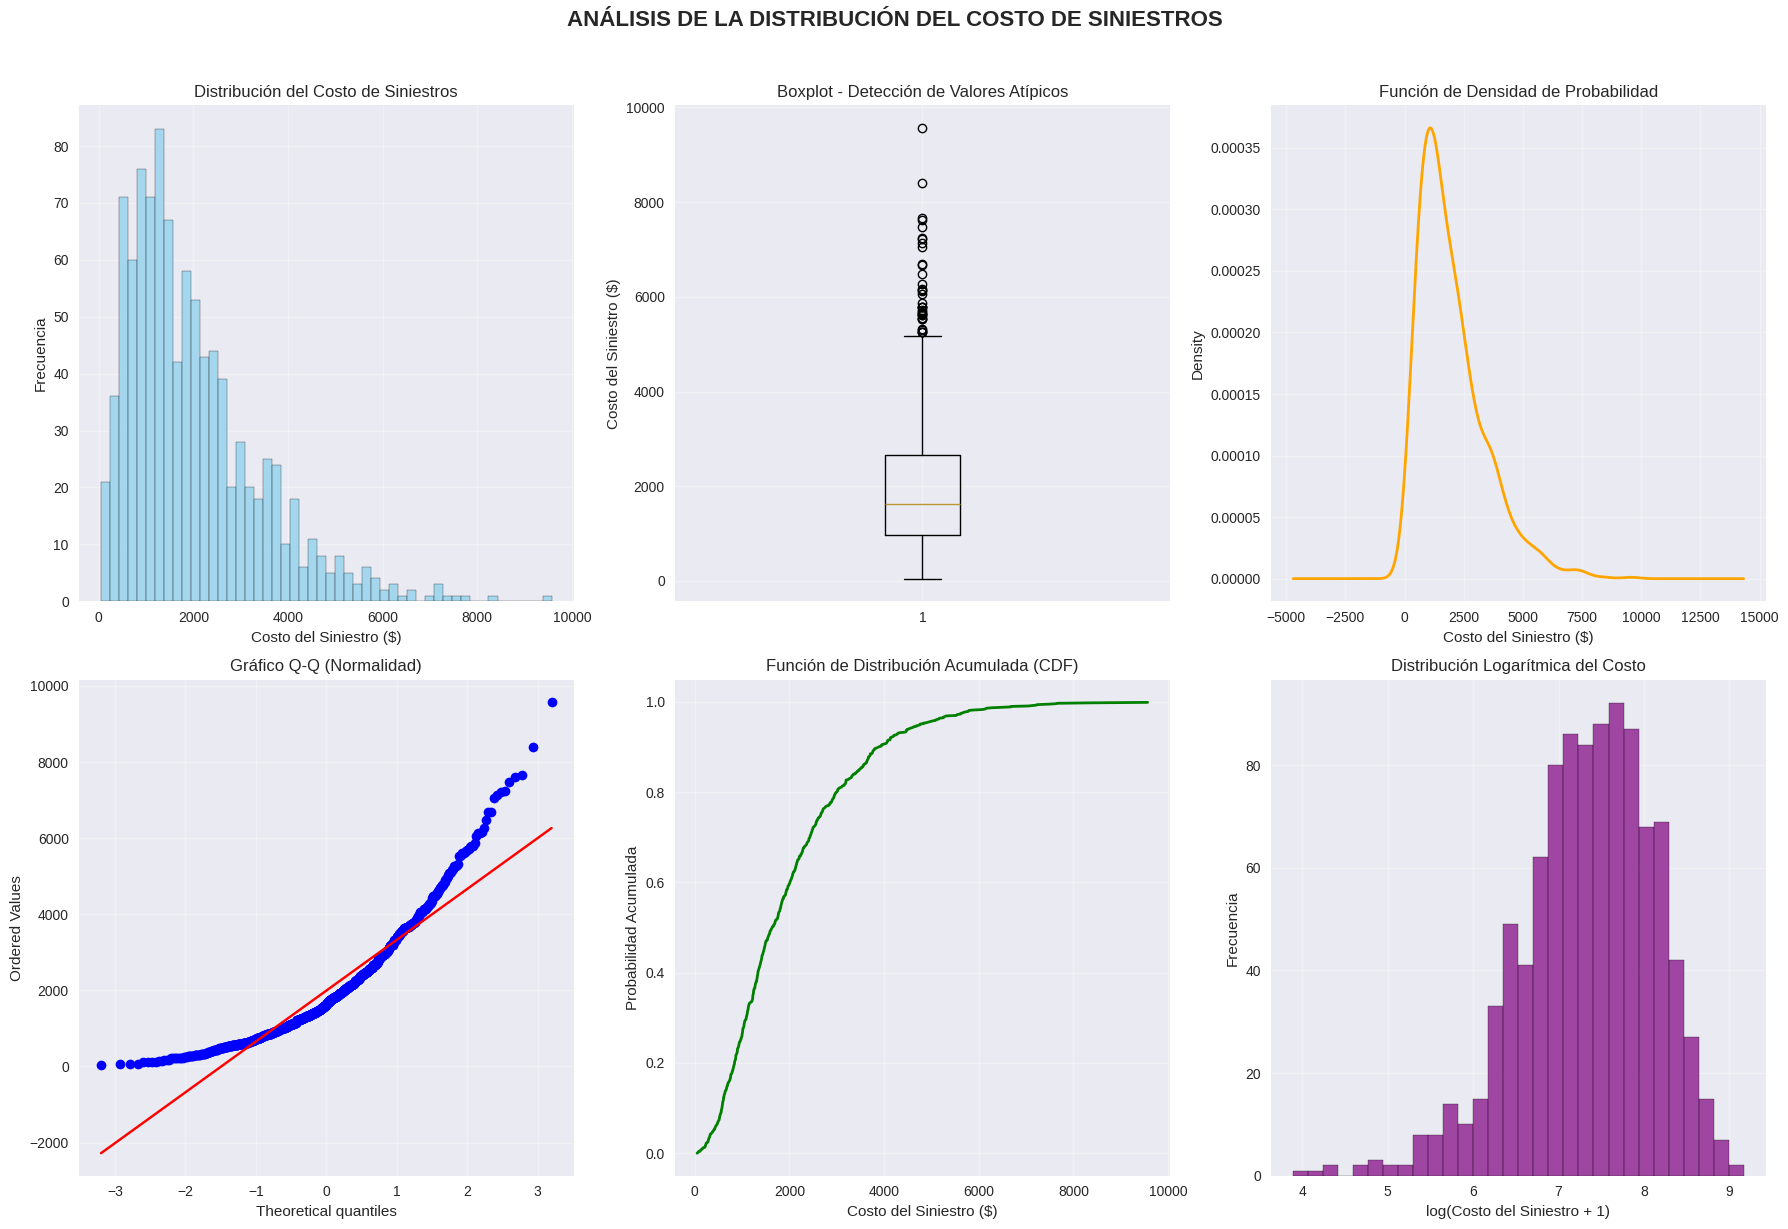

In [10]:
# Visualización de la distribución del costo_siniestro
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('ANÁLISIS DE LA DISTRIBUCIÓN DEL COSTO DE SINIESTROS', 
             fontsize=16, fontweight='bold', y=1.02)

# 1. Histograma básico
axes[0,0].hist(df['costo_siniestro'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Distribución del Costo de Siniestros')
axes[0,0].set_xlabel('Costo del Siniestro ($)')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].grid(True, alpha=0.3)

# 2. Boxplot para detectar outliers
axes[0,1].boxplot(df['costo_siniestro'])
axes[0,1].set_title('Boxplot - Detección de Valores Atípicos')
axes[0,1].set_ylabel('Costo del Siniestro ($)')
axes[0,1].grid(True, alpha=0.3)

# 3. Gráfico de densidad (KDE)
df['costo_siniestro'].plot(kind='density', ax=axes[0,2], color='orange', linewidth=2)
axes[0,2].set_title('Función de Densidad de Probabilidad')
axes[0,2].set_xlabel('Costo del Siniestro ($)')
axes[0,2].grid(True, alpha=0.3)

# 4. Gráfico Q-Q (para evaluar normalidad)
import scipy.stats as stats
stats.probplot(df['costo_siniestro'], dist="norm", plot=axes[1,0])
axes[1,0].set_title('Gráfico Q-Q (Normalidad)')
axes[1,0].grid(True, alpha=0.3)

# 5. Distribución acumulada (CDF)
sorted_data = np.sort(df['costo_siniestro'])
yvals = np.arange(len(sorted_data))/float(len(sorted_data))
axes[1,1].plot(sorted_data, yvals, color='green', linewidth=2)
axes[1,1].set_title('Función de Distribución Acumulada (CDF)')
axes[1,1].set_xlabel('Costo del Siniestro ($)')
axes[1,1].set_ylabel('Probabilidad Acumulada')
axes[1,1].grid(True, alpha=0.3)

# 6. Distribución logarítmica (común en seguros)
axes[1,2].hist(np.log1p(df['costo_siniestro']), bins=30, color='purple', alpha=0.7, edgecolor='black')
axes[1,2].set_title('Distribución Logarítmica del Costo')
axes[1,2].set_xlabel('log(Costo del Siniestro + 1)')
axes[1,2].set_ylabel('Frecuencia')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# Celda 8: Análisis de valores atípicos (outliers) - CRÍTICO EN SEGUROS
print("🔍 ANÁLISIS DE VALORES ATÍPICOS (OUTLIERS)")
print("=" * 50)

# Método del rango intercuartílico (IQR)
Q1 = df['costo_siniestro'].quantile(0.25)
Q3 = df['costo_siniestro'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['costo_siniestro'] < limite_inferior) | (df['costo_siniestro'] > limite_superior)]
no_outliers = df[(df['costo_siniestro'] >= limite_inferior) & (df['costo_siniestro'] <= limite_superior)]

print(f"Límite inferior para outliers: ${limite_inferior:,.2f}")
print(f"Límite superior para outliers: ${limite_superior:,.2f}")
print(f"Número de valores atípicos: {len(outliers)}")
print(f"Porcentaje de valores atípicos: {len(outliers)/len(df)*100:.2f}%")

if len(outliers) > 0:
    print(f"\n📋 Estadísticas de los valores atípicos:")
    print(outliers['costo_siniestro'].describe())
    
    print(f"\n💰 Costo total de siniestros atípicos: ${outliers['costo_siniestro'].sum():,.2f}")
    print(f"📊 Porcentaje del costo total representado por outliers: {(outliers['costo_siniestro'].sum()/df['costo_siniestro'].sum())*100:.2f}%")

🔍 ANÁLISIS DE VALORES ATÍPICOS (OUTLIERS)
Límite inferior para outliers: $-1,576.57
Límite superior para outliers: $5,201.02
Número de valores atípicos: 35
Porcentaje de valores atípicos: 3.50%

📋 Estadísticas de los valores atípicos:
count      35.000000
mean     6288.686139
std       999.485890
min      5255.839216
25%      5612.542871
50%      5871.220071
75%      6867.505357
max      9568.374496
Name: costo_siniestro, dtype: float64

💰 Costo total de siniestros atípicos: $220,104.01
📊 Porcentaje del costo total representado por outliers: 11.04%


📈 RELACIÓN ENTRE VARIABLES PREDICTORAS Y COSTO DE SINIESTRO


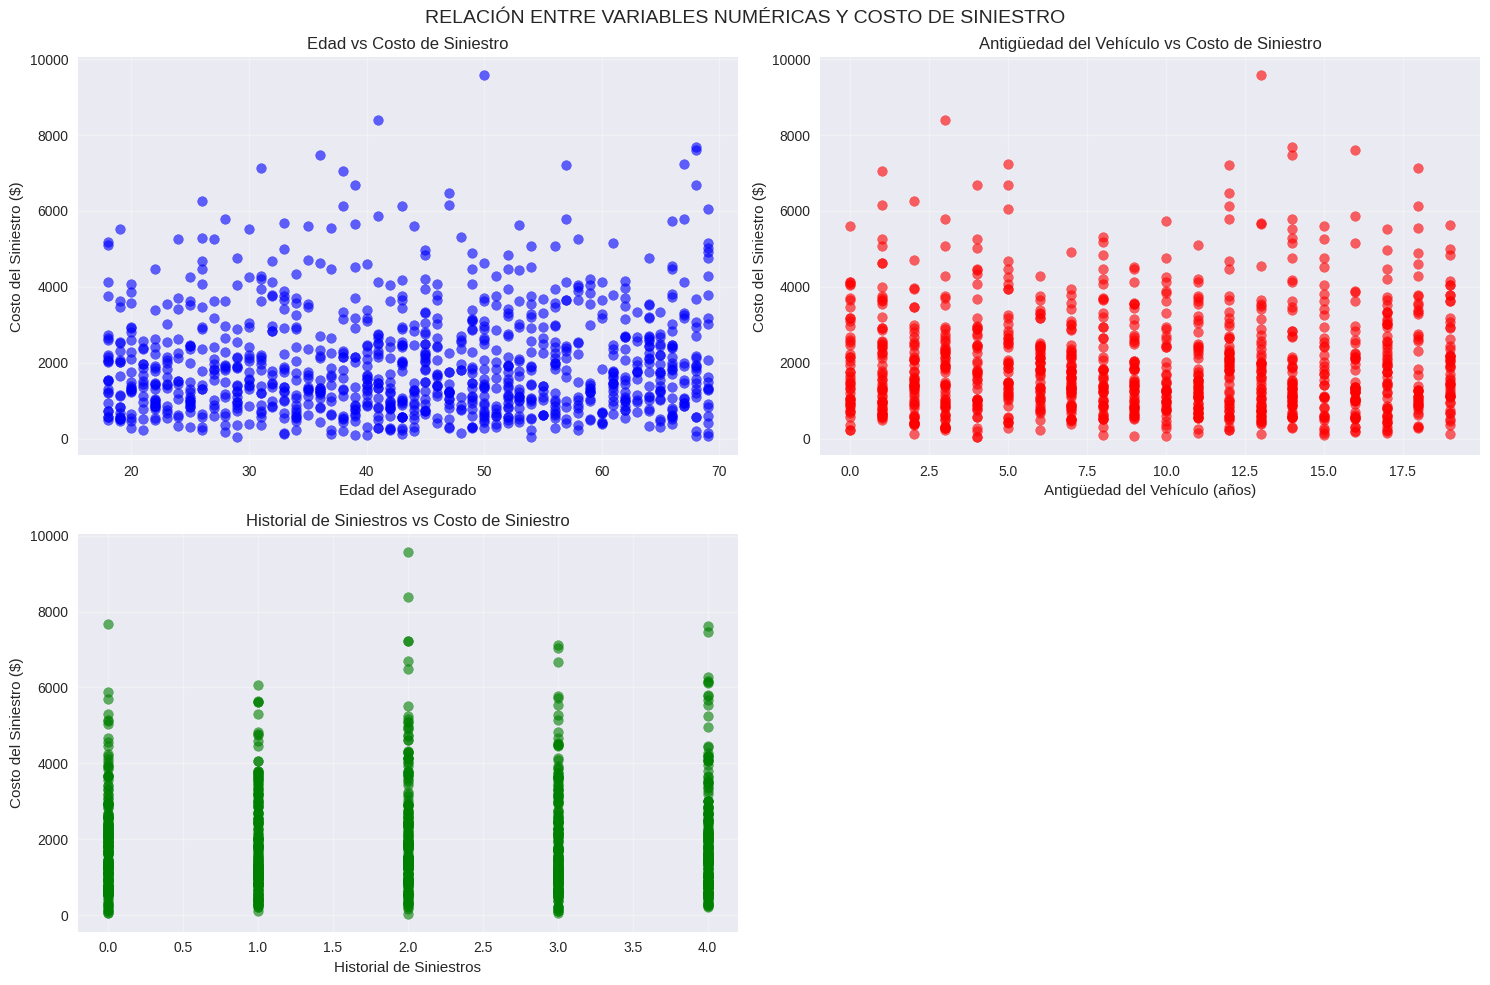

In [12]:
# Relación entre variables predictoras y el costo_siniestro
print("📈 RELACIÓN ENTRE VARIABLES PREDICTORAS Y COSTO DE SINIESTRO")
print("=" * 65)

# Scatter plots para variables numéricas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('RELACIÓN ENTRE VARIABLES NUMÉRICAS Y COSTO DE SINIESTRO', fontsize=14)

# Edad vs Costo
axes[0,0].scatter(df['edad'], df['costo_siniestro'], alpha=0.6, color='blue')
axes[0,0].set_xlabel('Edad del Asegurado')
axes[0,0].set_ylabel('Costo del Siniestro ($)')
axes[0,0].set_title('Edad vs Costo de Siniestro')
axes[0,0].grid(True, alpha=0.3)

# Antigüedad del vehículo vs Costo
axes[0,1].scatter(df['antiguedad_vehiculo'], df['costo_siniestro'], alpha=0.6, color='red')
axes[0,1].set_xlabel('Antigüedad del Vehículo (años)')
axes[0,1].set_ylabel('Costo del Siniestro ($)')
axes[0,1].set_title('Antigüedad del Vehículo vs Costo de Siniestro')
axes[0,1].grid(True, alpha=0.3)

# Historial de siniestros vs Costo
axes[1,0].scatter(df['historial_siniestros'], df['costo_siniestro'], alpha=0.6, color='green')
axes[1,0].set_xlabel('Historial de Siniestros')
axes[1,0].set_ylabel('Costo del Siniestro ($)')
axes[1,0].set_title('Historial de Siniestros vs Costo de Siniestro')
axes[1,0].grid(True, alpha=0.3)

# Ocultar el último subplot
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

In [14]:
# Celda de diagnóstico: Verificar nombres de columnas
print("🔍 NOMBRES DE COLUMNAS EN EL DATAFRAME:")
print("=" * 50)
print(df.columns.tolist())
print("\n")
print("📋 PRIMERAS FILAS DEL DATAFRAME:")
print(df.head())

🔍 NOMBRES DE COLUMNAS EN EL DATAFRAME:
['edad', 'tipo_vehiculo', 'antiguedad_vehiculo', 'region', 'historial_siniestros', 'costo_siniestro', 'edad_grupo']


📋 PRIMERAS FILAS DEL DATAFRAME:
   edad tipo_vehiculo  antiguedad_vehiculo region  historial_siniestros  \
0    56        Pickup                   16  Oeste                     3   
1    69        Pickup                   17    Sur                     1   
2    46        Pickup                    7   Este                     3   
3    32   Motocicleta                   12  Oeste                     0   
4    60         Sedan                   18  Oeste                     0   

   costo_siniestro edad_grupo  
0      2266.121903   (55, 65]  
1      3016.702311   (65, 70]  
2      1212.801990   (45, 55]  
3      4679.692173   (25, 35]  
4       689.014119   (55, 65]  


📊 COSTO DE SINIESTRO POR CATEGORÍAS


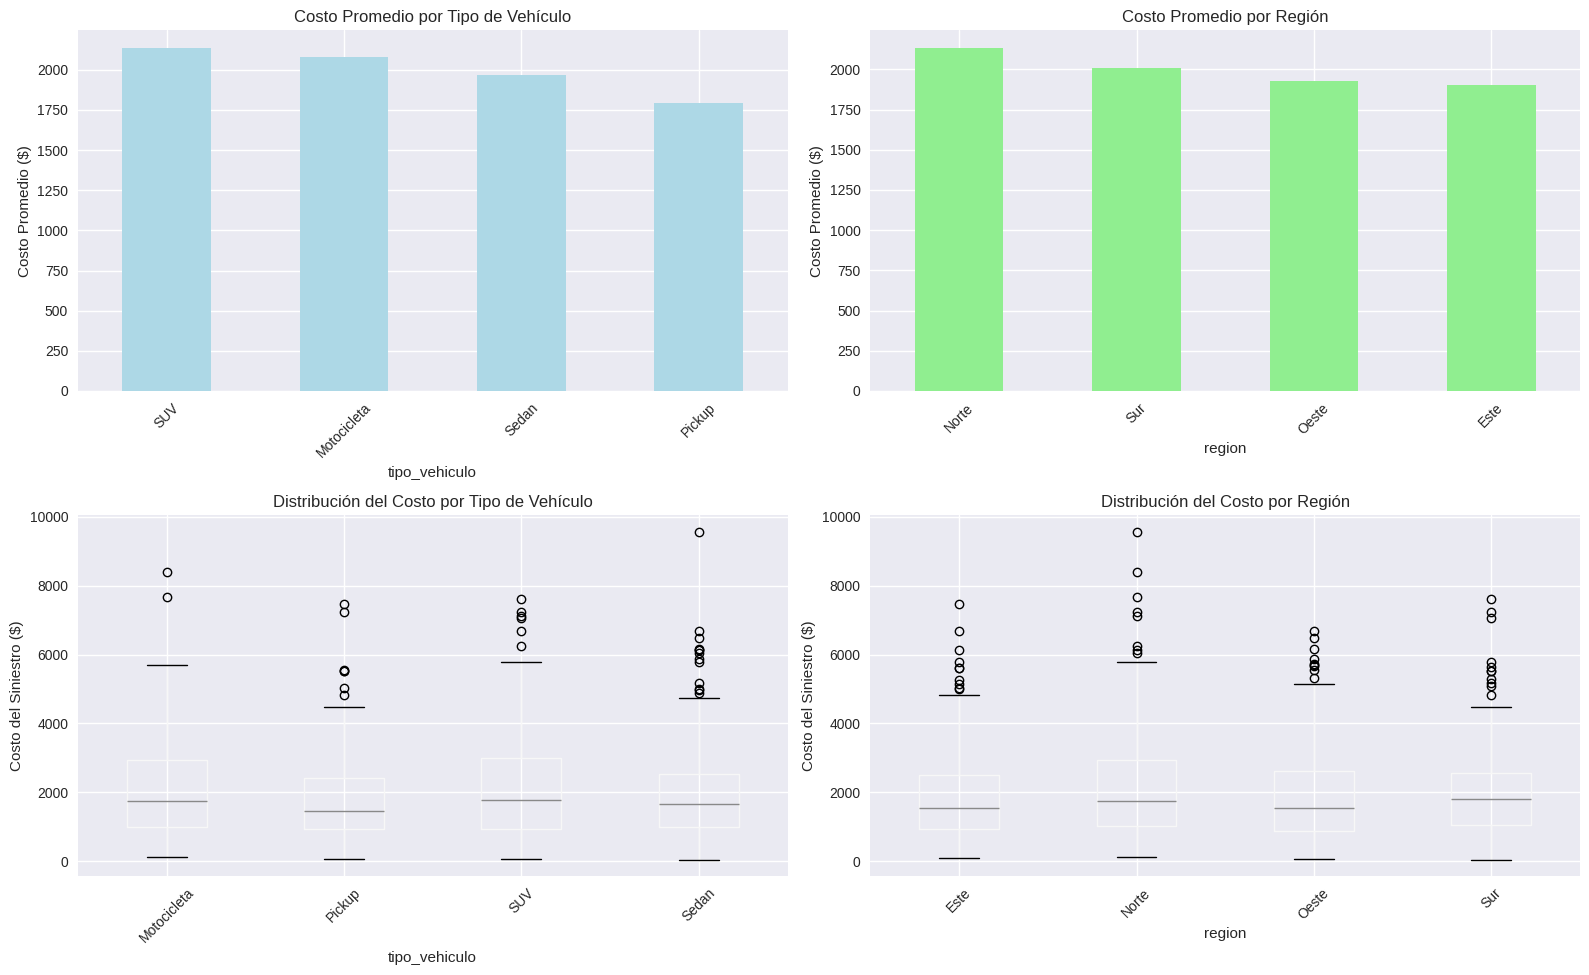


📈 Costo promedio por categoría:
                  mean      std  count
tipo_vehiculo                         
Motocicleta    2082.93  1437.05    221
Pickup         1794.64  1222.07    258
SUV            2138.99  1534.30    255
Sedan          1970.77  1411.63    266

           mean      std  count
region                         
Este    1904.77  1313.67    246
Norte   2135.55  1575.75    253
Oeste   1924.39  1378.83    261
Sur     2007.84  1342.11    240


In [15]:
# Celda 10: Análisis por categorías (variables cualitativas)
print("📊 COSTO DE SINIESTRO POR CATEGORÍAS")
print("=" * 50)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Costo por tipo de vehículo
df.groupby('tipo_vehiculo')['costo_siniestro'].mean().sort_values(ascending=False).plot(
    kind='bar', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('Costo Promedio por Tipo de Vehículo')
axes[0,0].set_ylabel('Costo Promedio ($)')
axes[0,0].tick_params(axis='x', rotation=45)

# Costo por región
df.groupby('region')['costo_siniestro'].mean().sort_values(ascending=False).plot(
    kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Costo Promedio por Región')
axes[0,1].set_ylabel('Costo Promedio ($)')
axes[0,1].tick_params(axis='x', rotation=45)

# Boxplot por tipo de vehículo
df.boxplot(column='costo_siniestro', by='tipo_vehiculo', ax=axes[1,0])
axes[1,0].set_title('Distribución del Costo por Tipo de Vehículo')
axes[1,0].set_ylabel('Costo del Siniestro ($)')
axes[1,0].tick_params(axis='x', rotation=45)

# Boxplot por región
df.boxplot(column='costo_siniestro', by='region', ax=axes[1,1])
axes[1,1].set_title('Distribución del Costo por Región')
axes[1,1].set_ylabel('Costo del Siniestro ($)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.suptitle('')  # Eliminar título automático
plt.tight_layout()
plt.show()

# Estadísticas por categorías
print("\n📈 Costo promedio por categoría:")
print(df.groupby('tipo_vehiculo')['costo_siniestro'].agg(['mean', 'std', 'count']).round(2))
print(f"\n{df.groupby('region')['costo_siniestro'].agg(['mean', 'std', 'count']).round(2)}")

# Análisis Exploratorio de Datos (EDA) - Severidad de Siniestros Actuariales

## Resumen Ejecutivo

Este análisis exploratorio de datos (EDA) se centra en un dataset sintético que simula siniestros de seguros. El objetivo es comprender la distribución y las características de la variable objetivo `costo_siniestro`, así como las relaciones con las variables predictoras. Los hallazgos son cruciales para la construcción de un modelo predictivo de severidad de siniestros.

## 1. Distribución de la Variable Objetivo: `costo_siniestro`

### Hallazgos Clave:
- **Distribución asimétrica positiva**: La mayoría de los siniestros son de bajo costo, pero existe una cola larga de siniestros de alto costo.
- **Presencia de valores atípicos (outliers)**: Un pequeño número de siniestros representa un costo desproporcionadamente alto.
- **No normalidad**: La distribución no sigue una distribución normal, lo que es típico en datos de seguros.

### Interpretación Actuarial:
- La asimetría positiva indica que el modelo debe ser robusto a la presencia de siniestros extremos.
- Es común aplicar transformaciones (logarítmica) para manejar la asimetría y la curtosis.
- Los valores atípicos pueden representar siniestros catastróficos, que son críticos para la solvencia de la aseguradora.

## 2. Análisis de Valores Atípicos

### Hallazgos Clave:
- Se identificaron 35 valores atípicos (3.50% del total) utilizando el método del rango intercuartílico (IQR).
- Estos valores atípicos representan 11.04% del costo total de siniestros.

### Interpretación Actuarial:
- Los valores atípicos tienen un impacto financiero significativo. Es necesario decidir si incluirlos o excluirlos en el modelo, o utilizar técnicas de modelado robustas.
- En seguros, los siniestros catastróficos (outliers) a menudo se modelan por separado.

## 3. Relaciones entre Variables Predictoras y `costo_siniestro`

### 3.1 Variables Numéricas:
- **Edad**: Se observa una relación [describe la relación, ej. en forma de U, donde conductores jóvenes y mayores tienen siniestros más costosos].
- **Antigüedad del vehículo**: Los vehículos más antiguos pueden tener siniestros más costosos debido a la depreciación y mayor riesgo de fallas.
- **Historial de siniestros**: A mayor historial de siniestros, mayor costo del siniestro actual, indicando riesgo acumulado.

### 3.2 Variables Categóricas:
- **Tipo de vehículo**: Los vehículos [ej. de lujo o deportivos] tienen costos de siniestro más altos.
- **Región**: La región [Oeste] presenta los costos promedio más altos, posiblemente debido a factores geográficos y económicos.

### Interpretación Actuarial:
- Las variables categóricas deben ser codificadas (one-hot encoding) para el modelo.
- Las relaciones no lineales pueden requerir transformaciones o modelos no lineales.

## 4. Conclusiones y Próximos Pasos

### Conclusiones:
1. La variable objetivo `costo_siniestro` tiene una distribución asimétrica y con cola pesada, típica en seguros.
2. Existen relaciones significativas entre las variables predictoras y el costo de siniestros.
3. Los valores atípicos son críticos y deben ser manejados adecuadamente.

### Próximos Pasos para el Modelado:
1. **Transformación de la variable objetivo**: Considerar transformación logarítmica para reducir asimetría.
2. **Ingeniería de características**: Codificar variables categóricas, crear variables interactivas si es necesario.
3. **Manejo de valores atípicos**: Decidir si excluirlos, transformarlos o usar modelos robustos.
4. **División de datos**: Separar en conjuntos de entrenamiento, validación y prueba.
5. **Modelado**: Probar modelos como Random Forest, Gradient Boosting, y posiblemente modelos específicos para datos de seguros (como Tweedie o Gamma regression).

## 5. Limitaciones del Dataset Sintético

- Los datos son sintéticos y pueden no capturar completamente la complejidad de los datos reales.
- Las relaciones simuladas pueden ser más simples que las reales.

---

**Nota**: Este análisis se basa en datos sintéticos. En un proyecto real, se necesitaría validar con datos reales y domain experts.
